## import data

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [2]:
import numpy as np
cifar_train_data = None

cifar_train_labels = []
import os
current_dir = os.getcwd()
data_dir = current_dir+"/data/CIFAR10/"
for i in range(1, 6):
    cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
    if i == 1:
        cifar_train_data = cifar_train_data_dict[b'data']
    else:
        cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))

    cifar_train_labels += cifar_train_data_dict[b'labels']

cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 32, 32, 3))
cifar_train_labels = np.array(cifar_train_labels)


cifar_test_data_dict = unpickle(data_dir + "/test_batch")
cifar_test_data = cifar_test_data_dict[b'data']
cifar_test_labels = np.array(cifar_test_data_dict[b'labels'])

cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 32, 32, 3))

In [3]:
cifar_train_data.shape

(50000, 32, 32, 3)

In [4]:
cifar_train_labels.shape

(50000,)

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [6]:
cifar_train_data,cifar_test_data = cifar_train_data/255.0 ,cifar_test_data/255.0

## build model

In [7]:
i = Input(shape=cifar_train_data[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
hist = model.fit(cifar_train_data,cifar_train_labels,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5998 - accuracy: 0.4434
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2272 - accuracy: 0.5682
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0748 - accuracy: 0.6243
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9563 - accuracy: 0.6662
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8687 - accuracy: 0.6930
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7698 - accuracy: 0.7286
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6907 - accuracy: 0.7585
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6102 - accuracy: 0.7830
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5339 - accuracy: 0.8101
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.468

## using data augmentation

In [9]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(cifar_train_data,cifar_train_labels,batch_size)
steps_per_epoch = cifar_train_data.shape[0]//batch_size
hist = model.fit_generator(train_generator,steps_per_epoch = steps_per_epoch, epochs = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.8484 - accuracy: 0.3428
Epoch 2/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.5535 - accuracy: 0.4430
Epoch 3/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.4194 - accuracy: 0.4954
Epoch 4/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.3179 - accuracy: 0.5346
Epoch 5/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.2371 - accuracy: 0.5678
Epoch 6/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.1768 - accuracy: 0.5887
Epoch 7/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.1255 - accuracy: 0.6073
Epoch 8/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.0838 - accuracy: 0.6202
Epoch 9/50
1562/1562 [==============================] - 20s 13ms/step - loss: 1.0374 - accur

     |████████████████████████████████| 6.8 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
confusion matrix without normalization
[[870  20   5   4  15   4  10   4  36  32]
 [ 16 864   3   3   7   2   9   2  24  70]
 [151   4 527  42 114  24  88  21  16  13]
 [ 69  23  52 444 124  74 116  38  33  27]
 [ 37   3  39  26 755  10  83  39   3   5]
 [ 56   4  38 174  86 486  54  67  20  15]
 [ 27   6  22  22  32   9 869   1  10   2]
 [ 35   5  10  29 126  24  11 737   3  20]
 [ 92  36   4   3   9   2   5   1 826  22]
 [ 41  91   4   5  10   2  12   6  13 816]]


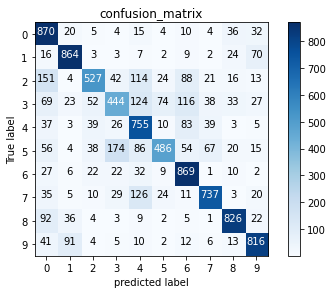

In [10]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title="confusion_matrix",cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
        
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment= "center",
                 color="white" if cm[i,j]> threshold else "black"
                )
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()
        
p_test = model. predict(cifar_test_data).argmax(axis=1)
cm = confusion_matrix(cifar_test_labels,p_test)
plot_confusion_matrix(cm, list(range(10)))